In [1]:
from domoku.tools import GomokuTools as gt
from domoku.policies.softadvice import MaxInfluencePolicyParams, MaxInfluencePolicy
from domoku.policies.maximal_criticality import MaxCriticalityPolicy
from domoku.board import GomokuBoard
from domoku.data import create_nxnx4
from domoku.constants import *

In [2]:
SIZE=15
hard_policy = MaxCriticalityPolicy(SIZE, overconfidence=2)
params = MaxInfluencePolicyParams(
    board_size=SIZE,
    sigma=.7,
    iota=3,
    radial_constr = [.0625, .125, .25, .5],
    radial_obstr = [-.0625, -.125, -.25, -.5]
)

heuristics = MaxInfluencePolicy(params, pov=WHITE, criticality_model=hard_policy)

2022-06-05 07:15:05.263966: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


### Visualizing the heuristic scores

ValueError: Exception encountered when calling layer "max_influence_policy" (type MaxInfluencePolicy).

zero-dimensional arrays cannot be concatenated

Call arguments received by layer "max_influence_policy" (type MaxInfluencePolicy):
  • sample=E5 E11 F5 F11 G5 H5 

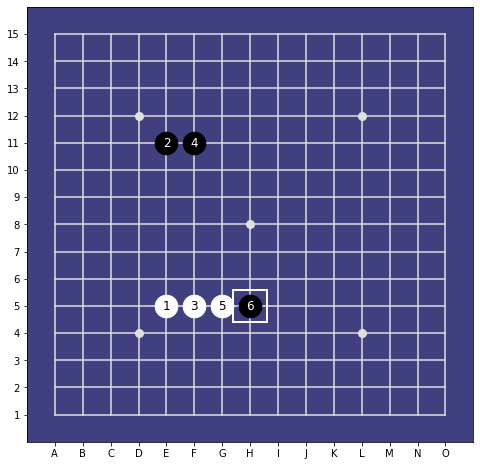

In [3]:
stones = gt.string_to_stones("E5E11F5F11G5H5")
board = GomokuBoard(SIZE, heuristics=heuristics, disp_width=8, stones=stones)
board.display()

### Querying heuristic scores one by one

In [4]:
state = create_nxnx4(SIZE, stones=stones)
heuristics(state, D5), heuristics(state, D11)